# Results Analysis & Visualization

This notebook analyzes the fine-tuning results, creates visualizations, and documents key insights about what the model learned.

## Overview

We'll compare baseline vs fine-tuned performance, identify improvement patterns, and create publication-ready charts for the article.

## What We'll Analyze

1. **Accuracy comparison** - Baseline vs fine-tuned metrics
2. **Confusion matrices** - Where did each model succeed/fail?
3. **Error analysis** - Which questions did fine-tuning fix?
4. **Pattern discovery** - What did the model learn?

## Requirements

- Baseline results from notebook 02
- Fine-tuned results from notebook 03
- **Can run locally** (no GPU needed)

## Key Questions We'll Answer

- How much did accuracy improve?
- Which types of questions improved most?
- What patterns did the model learn?
- Were there any regressions (baseline correct → fine-tuned wrong)?

## Output Files

**Data:**
- `comparison_results.csv` - Side-by-side comparison of all predictions
- `tableau_accuracy_data.csv` - Data formatted for Tableau

**Visualizations:**
- `accuracy_comparison.png` - Bar chart showing 56% → 73% improvement
- `confusion_matrix_comparison.png` - Side-by-side confusion matrices
- `improvement_breakdown.png` - Breakdown of improvements vs regressions

**Analysis:**
- `key_insights.md` - Documented patterns and learnings

---

Let's see what we achieved! 📈

# Import Libraries & Load the data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load both results
baseline_df = pd.read_csv("/Users/3rdSon/Desktop/clinical-trial-prediction/data/baseline_results.csv")
finetuned_df = pd.read_csv("/Users/3rdSon/Desktop/clinical-trial-prediction/data/finetuned_results.csv")

# Calculate accuracies

In [ ]:
baseline_correct = baseline_df['correct'].sum()
baseline_total = len(baseline_df[baseline_df['predicted_answer'].notna()])
baseline_accuracy = baseline_correct / baseline_total if baseline_total > 0 else 0

finetuned_correct = finetuned_df['correct'].sum()
finetuned_total = len(finetuned_df[finetuned_df['predicted_answer'].notna()])
finetuned_accuracy = finetuned_correct / finetuned_total if finetuned_total > 0 else 0

# Print comparison

In [ ]:
print("\n" + "="*80)
print("FINAL COMPARISON: BASELINE vs FINE-TUNED")
print("="*80)
print(f"Baseline Accuracy:    {baseline_accuracy:.1%} ({baseline_correct}/{baseline_total})")
print(f"Fine-tuned Accuracy:  {finetuned_accuracy:.1%} ({finetuned_correct}/{finetuned_total})")
print(f"Improvement:          +{(finetuned_accuracy - baseline_accuracy)*100:.1f} percentage points")
print(f"Relative improvement: +{((finetuned_accuracy - baseline_accuracy) / baseline_accuracy * 100):.1f}%")
print("="*80)



FINAL COMPARISON: BASELINE vs FINE-TUNED
Baseline Accuracy:    56.3% (116/206)
Fine-tuned Accuracy:  73.3% (151/206)
Improvement:          +17.0 percentage points
Relative improvement: +30.2%


In [4]:
# Which questions did fine-tuning fix?
baseline_df['improved'] = (~baseline_df['correct']) & finetuned_df['correct']
improved_questions = baseline_df[baseline_df['improved']]

print(f"\n✅ Fine-tuning FIXED {len(improved_questions)} questions that baseline got wrong")


✅ Fine-tuning FIXED 59 questions that baseline got wrong


# Net improvement

In [ ]:
net_improvement = len(improved_questions) - len(regressed_questions)
print(f"\n📊 Net improvement: +{net_improvement} questions")


📊 Net improvement: +35 questions


# Show examples of improvements

In [ ]:
if len(improved_questions) > 0:
    print("\n" + "="*80)
    print("EXAMPLES OF IMPROVEMENTS (baseline wrong → fine-tuned correct):")
    print("="*80)
    for idx, row in improved_questions.head(5).iterrows():
        print(f"\nQuestion: {row['Question'][:100]}...")
        print(f"True answer: {row['true_answer']}")
        print(f"Baseline predicted: {row['predicted_answer']}")
        print(f"Fine-tuned predicted: {finetuned_df.loc[idx, 'predicted_answer']}")


EXAMPLES OF IMPROVEMENTS (baseline wrong → fine-tuned correct):

Question: Will Capricor Therapeutics report top-line data from Cohort A of the Phase 3 HOPE-3 clinical trial f...
True answer: 0
Baseline predicted: 1
Fine-tuned predicted: 0

Question: Will ImmunityBio initiate a randomized registrational trial for Anktiva in BCG-unresponsive non-musc...
True answer: 0
Baseline predicted: 1
Fine-tuned predicted: 0

Question: Will Merck's pembrolizumab in combination with chemotherapy followed by olaparib maintenance receive...
True answer: 0
Baseline predicted: 1
Fine-tuned predicted: 0

Question: Will Stalicla initiate a Phase 3 clinical trial of mavoglurant for cocaine-use disorder by June 30, ...
True answer: 0
Baseline predicted: 1
Fine-tuned predicted: 0

Question: Will PharmaTher Holdings initiate a Phase 3 clinical trial of Ketarx (ketamine) for levodopa-induced...
True answer: 0
Baseline predicted: 1
Fine-tuned predicted: 0


# Save comparison

In [ ]:
comparison_df = pd.DataFrame({
    'Question': baseline_df['Question'],
    'true_answer': baseline_df['true_answer'],
    'baseline_prediction': baseline_df['predicted_answer'],
    'finetuned_prediction': finetuned_df['predicted_answer'],
    'baseline_correct': baseline_df['correct'],
    'finetuned_correct': finetuned_df['correct'],
    'improved': baseline_df['improved'],
    'regressed': baseline_df.get('regressed', False)
})

comparison_df.to_csv("comparison_results.csv", index=False)
print("\n✅ Full comparison saved to comparison_results.csv")


✅ Full comparison saved to comparison_results.csv


In [6]:
# Set style for professional-looking charts
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'


# Accuracy Comparison Bar Chart


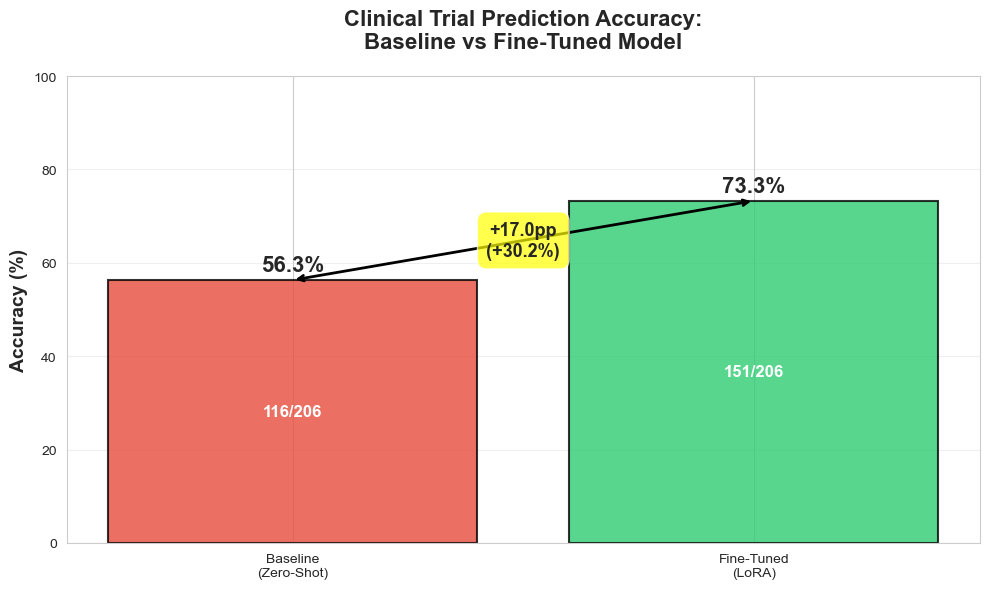

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Baseline\n(Zero-Shot)', 'Fine-Tuned\n(LoRA)']
accuracies = [baseline_accuracy * 100, finetuned_accuracy * 100]
colors = ['#e74c3c', '#2ecc71']  # Red for baseline, green for fine-tuned

bars = ax.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{acc:.1f}%',
            ha='center', va='bottom', fontsize=16, fontweight='bold')
    
    # Add the fraction below
    if i == 0:
        ax.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{baseline_correct}/{baseline_total}',
                ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    else:
        ax.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{finetuned_correct}/{finetuned_total}',
                ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Add improvement annotation
improvement = (finetuned_accuracy - baseline_accuracy) * 100
ax.annotate('', xy=(1, finetuned_accuracy * 100), xytext=(0, baseline_accuracy * 100),
            arrowprops=dict(arrowstyle='<->', color='black', lw=2))
ax.text(0.5, (baseline_accuracy * 100 + finetuned_accuracy * 100) / 2,
        f'+{improvement:.1f}pp\n(+30.2%)',
        ha='center', va='center', fontsize=13, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

ax.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_title('Clinical Trial Prediction Accuracy:\nBaseline vs Fine-Tuned Model', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: accuracy_comparison.png")
plt.show()


# IMAGE 3: Confusion Matrix Comparison


✅ Saved: confusion_matrix_comparison.png


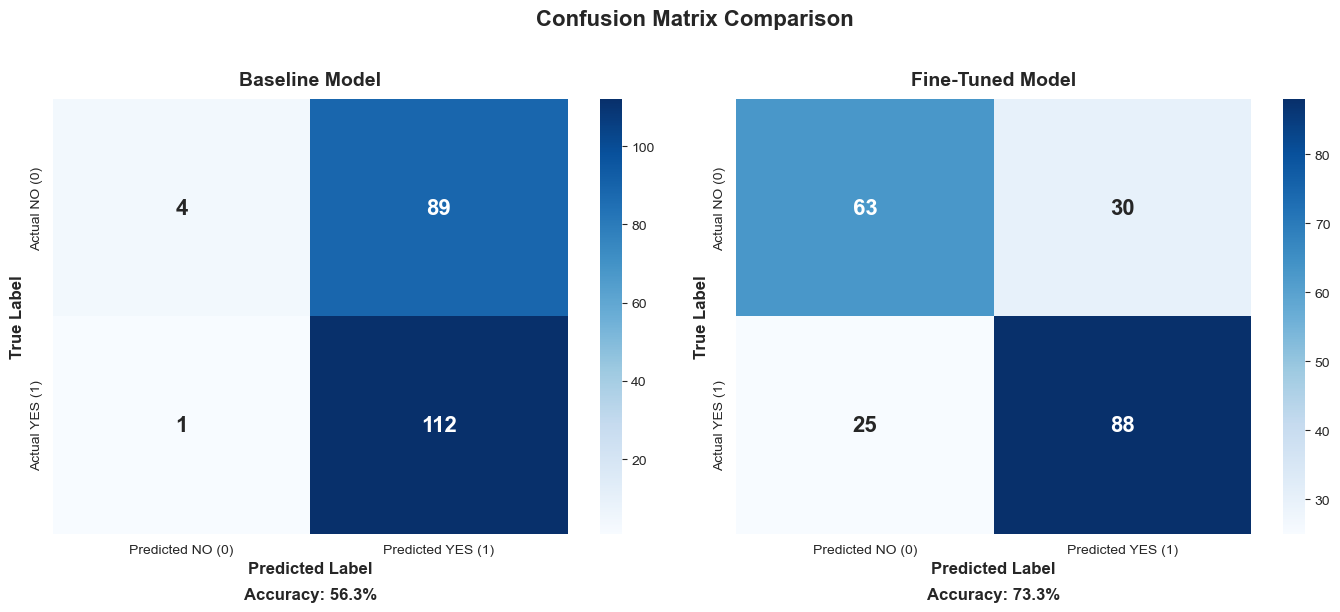

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Function to create confusion matrix
def create_confusion_matrix(df, ax, title):
    # Get predictions and true labels (only where prediction is not None)
    valid_mask = df['predicted_answer'].notna()
    y_true = df[valid_mask]['true_answer'].values
    y_pred = df[valid_mask]['predicted_answer'].values
    
    # Create confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted NO (0)', 'Predicted YES (1)'],
                yticklabels=['Actual NO (0)', 'Actual YES (1)'],
                cbar=True, ax=ax, annot_kws={'size': 16, 'weight': 'bold'})
    
    ax.set_title(title, fontsize=14, fontweight='bold', pad=10)
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    
    # Calculate accuracy and add it
    accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
    ax.text(0.5, -0.15, f'Accuracy: {accuracy:.1%}', 
            transform=ax.transAxes, ha='center', fontsize=12, fontweight='bold')
    
    return cm

# Create confusion matrices
cm_baseline = create_confusion_matrix(baseline_df, axes[0], 'Baseline Model')
cm_finetuned = create_confusion_matrix(finetuned_df, axes[1], 'Fine-Tuned Model')

plt.suptitle('Confusion Matrix Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrix_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: confusion_matrix_comparison.png")
plt.show()


# BONUS: Improvement Breakdown Chart


✅ Saved: improvement_breakdown.png


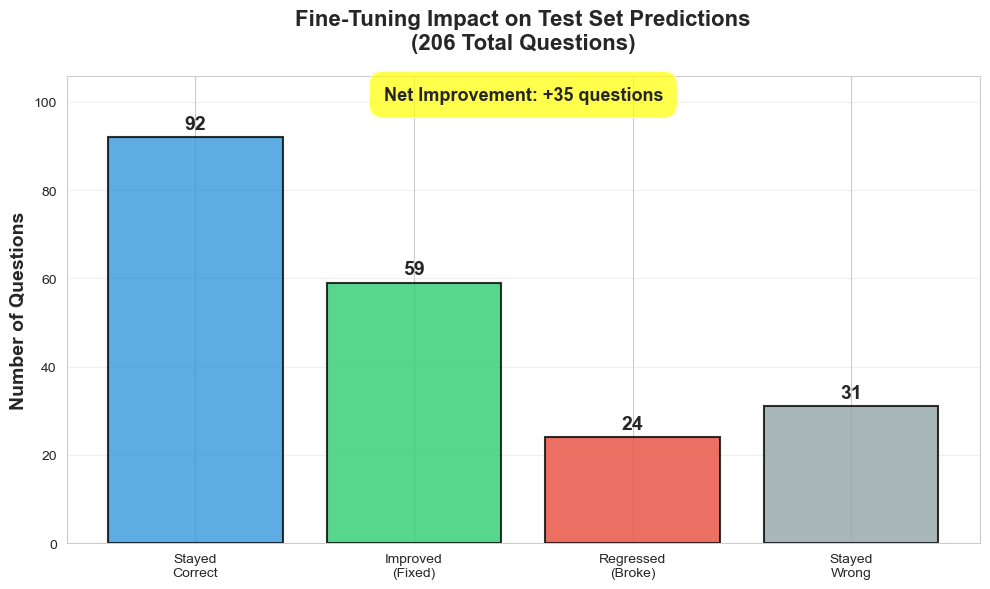

In [9]:
baseline_df['improved'] = (~baseline_df['correct']) & finetuned_df['correct']
baseline_df['regressed'] = baseline_df['correct'] & (~finetuned_df['correct'])

improved_count = baseline_df['improved'].sum()
regressed_count = baseline_df['regressed'].sum()
stayed_correct = (baseline_df['correct'] & finetuned_df['correct']).sum()
stayed_wrong = (~baseline_df['correct'] & ~finetuned_df['correct']).sum()

fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Stayed\nCorrect', 'Improved\n(Fixed)', 'Regressed\n(Broke)', 'Stayed\nWrong']
counts = [stayed_correct, improved_count, regressed_count, stayed_wrong]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#95a5a6']

bars = ax.bar(categories, counts, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{count}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylabel('Number of Questions', fontsize=14, fontweight='bold')
ax.set_title('Fine-Tuning Impact on Test Set Predictions\n(206 Total Questions)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylim(0, max(counts) * 1.15)
ax.grid(axis='y', alpha=0.3)

# Add net improvement annotation
net_improvement = improved_count - regressed_count
ax.text(0.5, 0.95, f'Net Improvement: +{net_improvement} questions', 
        transform=ax.transAxes, ha='center', fontsize=13, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('improvement_breakdown.png', dpi=300, bbox_inches='tight')
print("✅ Saved: improvement_breakdown.png")
plt.show()



# BONUS: Side-by-side Accuracy with Error Bars


✅ Saved: accuracy_comparison_simple.png


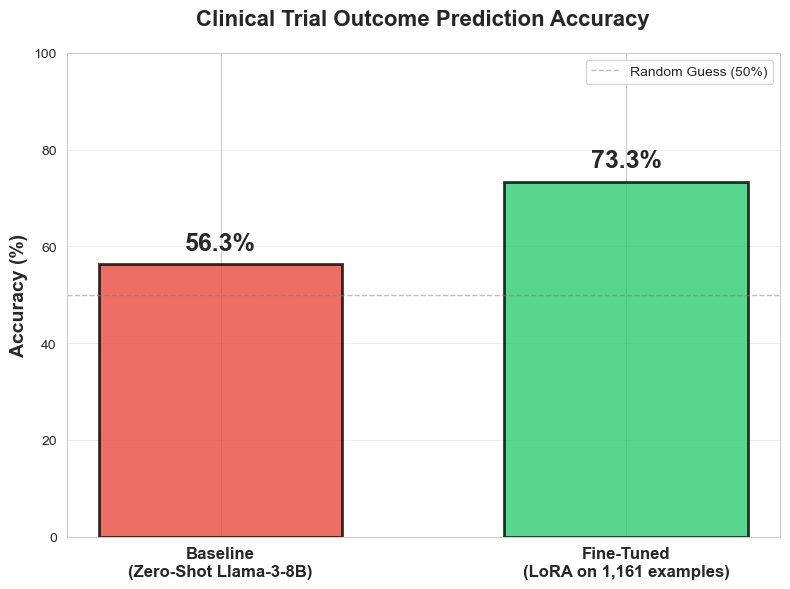

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(2)
width = 0.6

bars = ax.bar(x, [baseline_accuracy * 100, finetuned_accuracy * 100], 
               width, color=['#e74c3c', '#2ecc71'], alpha=0.8, 
               edgecolor='black', linewidth=2)

# Add percentage labels
for i, (bar, acc) in enumerate(zip(bars, [baseline_accuracy, finetuned_accuracy])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{acc*100:.1f}%',
            ha='center', va='bottom', fontsize=18, fontweight='bold')

ax.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_title('Clinical Trial Outcome Prediction Accuracy', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(['Baseline\n(Zero-Shot Llama-3-8B)', 'Fine-Tuned\n(LoRA on 1,161 examples)'], 
                    fontsize=12, fontweight='bold')
ax.set_ylim(0, 100)
ax.axhline(y=50, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='Random Guess (50%)')
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('accuracy_comparison_simple.png', dpi=300, bbox_inches='tight')
print("✅ Saved: accuracy_comparison_simple.png")
plt.show()

In [11]:
print("\n" + "="*80)
print("CHARTS GENERATED:")
print("="*80)
print("1. accuracy_comparison.png - Main comparison chart (USE FOR IMAGE 1)")
print("2. confusion_matrix_comparison.png - Confusion matrices (USE FOR IMAGE 3)")
print("3. improvement_breakdown.png - Breakdown of improvements (BONUS)")
print("4. accuracy_comparison_simple.png - Simpler version (ALTERNATIVE)")
print("="*80)


CHARTS GENERATED:
1. accuracy_comparison.png - Main comparison chart (USE FOR IMAGE 1)
2. confusion_matrix_comparison.png - Confusion matrices (USE FOR IMAGE 3)
3. improvement_breakdown.png - Breakdown of improvements (BONUS)
4. accuracy_comparison_simple.png - Simpler version (ALTERNATIVE)
